## Import Statistical Module

In [1]:
import xlrd
import pandas as pd
import numpy as np
import sys
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

## Load the File

In [2]:
#Load the File
filename='.\\BK for Wei 3.xlsx'
book=xlrd.open_workbook(filename)
print('Source file: '+sys.path[0]+filename+' loaded!')

Source file: .\BK for Wei 3.xlsx loaded!


In [3]:
nrows = book.sheet_by_name('target').nrows

In [4]:
nrows

120

In [5]:
header = book.sheet_by_name('target').row_values(0)

In [6]:
data = [book.sheet_by_name('target').row_values(i) for i in range(1, nrows)]

In [7]:
df = pd.DataFrame(data, columns = header)

## Extract Raw DataFrame

In [8]:
df

,StudyID,ACE_Inhibitor,BKHypBK,HypBKBK,Age,BMI,HbA1c,TotoalCholesterol,HDL,Triglycerides,hsCRP,LDL
0,DM001,0,0.057791,17.582649,46,29.80,5.0,235.0,50.0,290.0,7.4,127.00
1,DM003,0,0.132757,7.533061,40,33.30,5.3,139.0,39.0,96.0,1.9,81.00
2,DM004,0,0.269416,3.712065,50,19.60,5.4,164.6,53.6,132.6,0.4,84.48
3,DM005,0,0.169639,5.897226,37,33.00,5.7,166.0,108.0,122.0,1.4,34.00
4,DM006,0,0.348889,2.866964,53,41.50,5.9,158.4,80.4,46.8,0.6,68.64
5,DM007,0,0.707396,1.413821,46,23.00,5.7,154.0,112.0,37.0,1.1,34.00
6,DM008,0,0.204086,4.901285,37,43.60,6.1,202.0,83.0,112.0,15.1,97.00
7,DM009,1,0.042670,23.515039,32,33.60,6.1,238.0,54.0,115.0,2.6,162.00
8,DM010,0,0.493274,2.027968,73,32.80,6.1,157.2,38.6,118.0,6.4,95.00
9,DM012,1,0.554848,1.802519,55,23.20,7.1,125.0,53.0,33.0,0.2,65.00


## Multiple Linear Regression with ACEI Combined

In [9]:
parameters = header[2:]
#parameters.extend(['HypBKBK', 'BKHypBK', 'Age', 'BMI'])
data = df[parameters]
data = data.astype(float)

### BK/HypBK vs Other Parameters

In [10]:
model = ols('BKHypBK~Age+BMI+HbA1c+TotoalCholesterol+HDL+Triglycerides+hsCRP+LDL', 
            data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BKHypBK   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     12.84
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           6.53e-13
Time:                        17:01:44   Log-Likelihood:                -14.099
No. Observations:                 119   AIC:                             46.20
Df Residuals:                     110   BIC:                             71.21
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.7716      0.234      3.291      0.001         0.307     1.236
Age                  -0.0048      0.002     -2.874      0.005        -0.008    -0.001
BMI                  -0.0189      0.004     -5.054      0.000        -0.026    -0.012
HbA1c                 0.1028      0.017      5.904      0.000         0.068     0.137
TotoalCholesterol    -0.0191      0.061     -0.313      0.755        -0.140     0.102
HDL                   0.0184      0.061      0.301      0.764        -0.102     0.139
Triglycerides         0.0026      0.012      0.210      0.834        -0.022     0.027
hsCRP                 0.0057      0.002      3.071      0.003         0.002     0.009
LDL                   0.0176      0.061      0.288      0.774        -0.104     0.139
==============================================================================
Omnibus:                       56.060   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.904
Skew:                           1.710   Prob(JB):                     9.55e-42
Kurtosis:                       8.139   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### HypBK/BK vs Other Parameters

In [11]:
model = ols('HypBKBK~Age+BMI+HbA1c+TotoalCholesterol+HDL+Triglycerides+hsCRP+LDL', 
            data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HypBKBK   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     9.142
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           1.42e-09
Time:                        17:01:44   Log-Likelihood:                -369.22
No. Observations:                 119   AIC:                             756.4
Df Residuals:                     110   BIC:                             781.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -6.5497      4.635     -1.413      0.160       -15.736     2.637
Age                  -0.0061      0.033     -0.188      0.852        -0.071     0.059
BMI                   0.2912      0.074      3.931      0.000         0.144     0.438
HbA1c                -0.6168      0.344     -1.792      0.076        -1.299     0.065
TotoalCholesterol    -0.3484      1.207     -0.289      0.773        -2.741     2.044
HDL                   0.3772      1.204      0.313      0.755        -2.008     2.763
Triglycerides         0.1052      0.242      0.435      0.664        -0.374     0.584
hsCRP                -0.1064      0.037     -2.890      0.005        -0.179    -0.033
LDL                   0.3964      1.209      0.328      0.744        -1.999     2.792
==============================================================================
Omnibus:                       49.733   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.194
Skew:                           1.610   Prob(JB):                     1.97e-29
Kurtosis:                       7.036   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=========================

## Drop Angiotensin Converting Enzyme Inhibitor (ACEI) Positive Data

In [12]:
df_withoutACEI = df[df['ACE_Inhibitor'] != 1]

In [13]:
parameters = header[2:]
#parameters.extend(['HypBKBK', 'BKHypBK', 'Age', 'BMI'])
data_withoutACEI = df_withoutACEI[parameters]
data_withoutACEI = data_withoutACEI.astype(float)

### BK/HypBK vs Other Parameters

In [14]:
model = ols('BKHypBK~Age+BMI+HbA1c+TotoalCholesterol+HDL+Triglycerides+hsCRP+LDL', 
            data_withoutACEI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BKHypBK   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     6.990
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           5.67e-07
Time:                        17:01:44   Log-Likelihood:                -13.171
No. Observations:                  90   AIC:                             44.34
Df Residuals:                      81   BIC:                             66.84
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.8156      0.286      2.854      0.005         0.247     1.384
Age                  -0.0033      0.002     -1.711      0.091        -0.007     0.001
BMI                  -0.0185      0.004     -4.259      0.000        -0.027    -0.010
HbA1c                 0.0960      0.028      3.471      0.001         0.041     0.151
TotoalCholesterol    -0.0134      0.076     -0.177      0.860        -0.164     0.137
HDL                   0.0121      0.076      0.160      0.873        -0.138     0.162
Triglycerides         0.0008      0.015      0.055      0.956        -0.029     0.031
hsCRP                 0.0070      0.002      3.341      0.001         0.003     0.011
LDL                   0.0120      0.076      0.158      0.875        -0.139     0.163
==============================================================================
Omnibus:                       51.141   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.024
Skew:                           1.867   Prob(JB):                     9.00e-42
Kurtosis:                       9.039   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### HypBK/BK vs Other Parameters

In [15]:
model = ols('HypBKBK~Age+BMI+HbA1c+TotoalCholesterol+HDL+Triglycerides+hsCRP+LDL', 
            data_withoutACEI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HypBKBK   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     6.130
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           3.65e-06
Time:                        17:01:44   Log-Likelihood:                -280.97
No. Observations:                  90   AIC:                             579.9
Df Residuals:                      81   BIC:                             602.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -3.1009      5.601     -0.554      0.581       -14.245     8.043
Age                  -0.0017      0.037     -0.045      0.964        -0.076     0.073
BMI                   0.2780      0.085      3.273      0.002         0.109     0.447
HbA1c                -1.2481      0.542     -2.302      0.024        -2.327    -0.169
TotoalCholesterol     0.5760      1.485      0.388      0.699        -2.379     3.531
HDL                  -0.5491      1.481     -0.371      0.712        -3.496     2.398
Triglycerides        -0.0708      0.297     -0.238      0.812        -0.661     0.520
hsCRP                -0.1085      0.041     -2.655      0.010        -0.190    -0.027
LDL                  -0.5340      1.487     -0.359      0.720        -3.492     2.424
==============================================================================
Omnibus:                       46.541   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.926
Skew:                           1.796   Prob(JB):                     3.05e-30
Kurtosis:                       7.832   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=================

## ACEI

In [16]:
df_withACEI = df[df['ACE_Inhibitor'] == 1]

In [17]:
parameters = header[2:]
#parameters.extend(['HypBKBK', 'BKHypBK', 'Age', 'BMI'])
data_withACEI = df_withACEI[parameters]
data_withACEI = data_withACEI.astype(float)

In [22]:
df_withACEI

,StudyID,ACE_Inhibitor,BKHypBK,HypBKBK,Age,BMI,HbA1c,TotoalCholesterol,HDL,Triglycerides,hsCRP,LDL
7,DM009,1,0.042670,23.515039,32,33.60,6.1,238.0,54.0,115.0,2.6,162.00
9,DM012,1,0.554848,1.802519,55,23.20,7.1,125.0,53.0,33.0,0.2,65.00
19,DM023,1,0.078961,12.669226,59,18.90,5.9,353.9,119.5,125.7,43.3,209.26
21,DM025,1,0.073034,13.693150,66,30.20,6.1,193.6,32.6,249.4,3.4,111.12
26,DM030,1,0.063238,16.025446,78,25.80,7.2,152.0,48.0,171.0,0.8,70.00
28,DM048,1,0.099971,10.025008,59,37.20,5.5,180.0,35.0,245.0,6.4,96.00
32,DM052,1,0.090985,10.999810,43,34.20,7.6,137.0,49.0,94.0,9.2,69.00
33,DM053,1,0.205175,4.874267,65,31.30,6.6,145.0,43.0,95.0,1.7,83.00
34,DM054,1,0.077052,12.979192,48,35.90,5.7,127.0,35.0,117.0,0.7,69.00
35,DM055,1,1.308654,0.764371,61,24.10,14.0,140.0,101.0,34.0,0.6,33.00


### BK/HypBK vs Other Parameters

In [18]:
model = ols('BKHypBK~Age+BMI+HbA1c+TotoalCholesterol+HDL+Triglycerides+hsCRP+LDL', 
            data_withACEI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BKHypBK   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.50
Date:                Fri, 07 Oct 2016   Prob (F-statistic):           5.10e-07
Time:                        17:01:44   Log-Likelihood:                 12.927
No. Observations:                  29   AIC:                            -7.854
Df Residuals:                      20   BIC:                             4.452
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.5670      0.493      1.151      0.263        -0.461     1.595
Age                  -0.0078      0.003     -2.368      0.028        -0.015    -0.001
BMI                  -0.0218      0.007     -3.079      0.006        -0.036    -0.007
HbA1c                 0.1326      0.022      6.004      0.000         0.087     0.179
TotoalCholesterol     0.0807      0.088      0.919      0.369        -0.102     0.264
HDL                  -0.0801      0.088     -0.910      0.374        -0.264     0.103
Triglycerides        -0.0166      0.018     -0.943      0.357        -0.053     0.020
hsCRP                -0.0089      0.006     -1.624      0.120        -0.020     0.003
LDL                  -0.0811      0.088     -0.923      0.367        -0.264     0.102
==============================================================================
Omnibus:                        1.807   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.269
Skew:                           0.511   Prob(JB):                        0.530
Kurtosis:                       2.922   Cond. No.                     3.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### HypBK/BK vs Other Parameters

In [19]:
model = ols('HypBKBK~Age+BMI+HbA1c+TotoalCholesterol+HDL+Triglycerides+hsCRP+LDL', 
            data_withACEI).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HypBKBK   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     3.525
Date:                Fri, 07 Oct 2016   Prob (F-statistic):             0.0105
Time:                        17:01:45   Log-Likelihood:                -83.187
No. Observations:                  29   AIC:                             184.4
Df Residuals:                      20   BIC:                             196.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -1.5697     13.551     -0.116      0.909       -29.836    26.696
Age                  -0.0810      0.090     -0.898      0.380        -0.269     0.107
BMI                   0.3794      0.194      1.952      0.065        -0.026     0.785
HbA1c                -0.5238      0.608     -0.862      0.399        -1.791     0.743
TotoalCholesterol    -1.9510      2.415     -0.808      0.429        -6.990     3.088
HDL                   1.9582      2.419      0.809      0.428        -3.088     7.005
Triglycerides         0.4165      0.483      0.862      0.399        -0.592     1.425
hsCRP                 0.1084      0.151      0.716      0.482        -0.207     0.424
LDL                   1.9765      2.415      0.818      0.423        -3.062     7.015
==============================================================================
Omnibus:                        3.270   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                2.102
Skew:                           0.644   Prob(JB):                        0.350
Kurtosis:                       3.282   Cond. No.                     3.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Plotting: BK/HypBK (y) versus HbA1c (x)

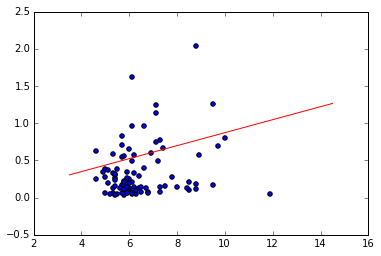

In [23]:
x=np.arange(3.5, 15.)
y=0.0873 * x 

plt.scatter(data_withoutACEI['HbA1c'], data_withoutACEI['BKHypBK'])
plt.plot(x, y, color='r')
#plt.savefig('StandardCurve.png', dpi=400)